## Generating Data (Including Bias = 1)

In [131]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(123)

x = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
            [1],
            [1],
            [0]])
x.shape, y.shape

((4, 3), (4, 1))

## Building Model

In [148]:
#Number of epochs
num_epochs = 1000

#initialize weights
w0 = 2*np.random.random((3,4)) - 1
w1 = 2*np.random.random((4,1)) - 1
w0.shape,w1.shape

((3, 4), (4, 1))

## Activation Function (Sigmoid)

In [149]:
def sig(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))

## Train Model

In [156]:
learning_rate_list = [0.001,0.003,0.006,0.01]

error_matrix1 = []
error_matrix2 = []
error_matrix3 = []
error_matrix4 = []
    
# def xor(learning_rate, x, y, num_epochs, w0, w1):
for i in learning_rate_list:
    for j in range(num_epochs):
        #feed forward through layers 0,1, and 2
        k0 = x
        k1 = sig(np.dot(k0, w0))
        k2 = sig(np.dot(k1, w1))

        #how much did we miss the target value?
        k2_error = (y - k2)

        if i == 0.001:
            error_matrix1.append(np.mean(np.square(k2_error)))
        elif i == 0.003:
            error_matrix2.append(np.mean(np.square(k2_error)))
        elif i == 0.006:
            error_matrix3.append(np.mean(np.square(k2_error)))        
        elif i == 0.01:
            error_matrix4.append(np.mean(np.square(k2_error)))


        if (j% 10000) == 0:
            print ("Error:" + str(np.mean(np.square(k2_error))))

        #in what direction is the target value?
        k2_delta = k2_error*sig(k2, deriv=True)

        #how much did each k1 value contribute to k2 error
        k1_error = k2_delta.dot(w1.T)

        k1_delta= k1_error * sig(k1,deriv=True)

        if j >= num_epochs-1:
            w0 = 2*np.random.random((3,4)) - 1
            w1 = 2*np.random.random((4,1)) - 1

        else:
            w1 += i*(k1.T.dot(k2_delta))
            w0 += i*(k0.T.dot(k1_delta))

    print("Output for Learning Rate:",i,"\n", k2)
for i in learning_rate_list:
    xor(i, x, y, num_epochs, w0, w1)

Error:0.25336774894029646
Error:0.25336774894029646
Error:0.25336774894029646
Error:0.25336774894029646


((4, 1), (4, 1), (4, 1), (4, 1))

## PLOTTING

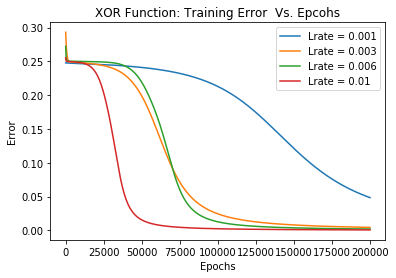

In [6]:

# print(error_matrix)
plt.plot(error_matrix1, label = 'Lrate = 0.001')
plt.plot(error_matrix2, label = 'Lrate = 0.003')
plt.plot(error_matrix3, label = 'Lrate = 0.006')
plt.plot(error_matrix4, label = 'Lrate = 0.01')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.title('XOR Function: Training Error  Vs. Epcohs')
plt.show()

## Desicion Function Output

In [7]:
print("Decision Function Output:\n",k2)

Decision Function Output:
 [[0.02956949]
 [0.96783721]
 [0.97657291]
 [0.02972595]]


## Plottting Non-Linear Decision Boundary

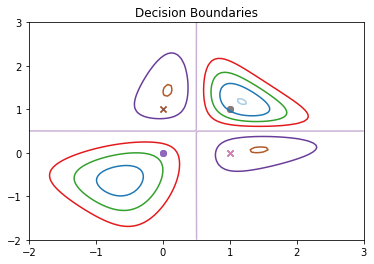

In [9]:
from sklearn import svm

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'rbf',  gamma=0.7, C=C )
clf.fit(x, y.ravel())

h = 0.02# step size in the mesh
# create a mesh to plot in
for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(x[i, 0], x[i, 1], marker=u'x')
    elif y[i] == 0:
        plt.scatter(x[i, 0], x[i, 1], marker=u'o')
 
xx, yy = np.mgrid[-2:3:100j, -2:3:100j]


XXX = []
for xs, ys in zip(xx, yy):
    for x_, y_ in zip(xs, ys):
        XXX.append([x_,y_,y_*x_])
Z = clf.decision_function(XXX)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision Boundaries")
plt.show()

# Bonus

In [161]:
import operator
from functools import reduce
multiply = operator.mul
inputB = np.random.uniform(low=-1, high=1, size=(50,2))

inputB_padded = np.insert(inputB, 2, 1, axis=1)


def sign(x):
    if x > 0:
        return 1.
    elif x < 0:
        return -1.
    elif x == 0:
        return 0.
    else:
        return x

output_list = [reduce(multiply, a_list) for a_list in inputB]
outputB = np.asarray(output_list)
sign_xy_list= []
for i in outputB:
    signM = sign(i)
    sign_xy_list.append(signM)
sign_xy = np.asarray(sign_xy_list)
sign_xy = sign_xy[:, np.newaxis]

inputB_padded.shape, sign_xy.shape 

((50, 3), (50, 1))

## Building Model

In [166]:
#Number of epochs
num_epochsB = 40000

#initialize weights
w0B = 2*np.random.random((3,len(inputB))) - 1
w1B = 2*np.random.random((len(inputB),1)) - 1
w0B.shape, w1B.shape

((3, 50), (50, 1))

In [167]:
# learning_rate_list = [0.001,0.003,0.006,0.01]

error_matrix1B = []
error_matrix2B = []
error_matrix3B = []
error_matrix4B = []
    
# def xor(learning_rate, x, y, num_epochs, w0, w1):
for o in learning_rate_list:
    for p in range(num_epochsB):
        #feed forward through layers 0,1, and 2
        k0B = inputB_padded
        k1B = sig(np.dot(k0B, w0B))
        k2B = sig(np.dot(k1B, w1B))

        #how much did we miss the target value?
        k2_errorB = (sign_xy - k2B)

        if o == 0.001:
            error_matrix1B.append(np.mean(np.square(k2_errorB)))
        elif o == 0.003:
            error_matrix2B.append(np.mean(np.square(k2_errorB)))
        elif o == 0.006:
            error_matrix3B.append(np.mean(np.square(k2_errorB)))        
        elif o == 0.01:
            error_matrix4B.append(np.mean(np.square(k2_errorB)))


        if (p% 10000) == 0:
            print ("Error:" + str(np.mean(np.square(k2_errorB))))

        #in what direction is the target value?
        k2_deltaB = k2_errorB*sig(k2B, deriv=True)

        #how much did each k1 value contribute to k2 error
        k1_errorB = k2_deltaB.dot(w1B.T)

        k1_deltaB= k1_errorB * sig(k1B,deriv=True)

        if j >= num_epochsB-1:
            w0B = 2*np.random.random((3,len(inputB))) - 1
            w1B = 2*np.random.random((len(inputB),1)) - 1

        else:
            w1B += o*(k1B.T.dot(k2_deltaB))
            w0B += o*(k0B.T.dot(k1_deltaB))

    print("Output for Learning Rate:",o,"\n", k2B)

Error:1.1123185578794368
Error:0.7217794641395154
Error:0.7080406492486075
Error:0.7002671863102995
Output for Learning Rate: 0.001 
 [[9.98429075e-01]
 [4.60823374e-03]
 [2.06976475e-09]
 [3.25171166e-05]
 [3.69505457e-03]
 [8.64182179e-02]
 [3.34021313e-08]
 [8.70028827e-06]
 [9.98636270e-01]
 [6.17932557e-02]
 [3.04352669e-05]
 [1.60687501e-05]
 [9.99881449e-01]
 [9.99986824e-01]
 [3.54316030e-09]
 [1.62276591e-03]
 [6.72485238e-10]
 [1.74416395e-10]
 [1.86722214e-09]
 [2.60761723e-05]
 [1.86442389e-04]
 [9.99998973e-01]
 [3.74365440e-07]
 [5.75876171e-02]
 [3.40874331e-05]
 [2.00625720e-06]
 [9.23443901e-01]
 [9.99994668e-01]
 [7.23484366e-06]
 [1.17572028e-01]
 [9.99977372e-01]
 [2.89634920e-02]
 [7.24566248e-04]
 [3.00665803e-08]
 [9.99986955e-01]
 [4.17963344e-10]
 [9.99984753e-01]
 [1.24745270e-03]
 [4.01415034e-08]
 [1.17086887e-04]
 [7.26240661e-09]
 [5.91757221e-01]
 [9.65768205e-01]
 [8.02496702e-05]
 [9.96070891e-01]
 [5.97400792e-01]
 [9.99803566e-01]
 [9.99988148e-01]
 [

## PLOTTING

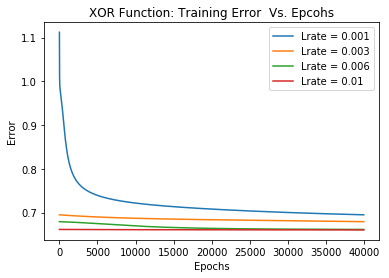

In [168]:

# print(error_matrix)
plt.plot(error_matrix1B, label = 'Lrate = 0.001')
plt.plot(error_matrix2B, label = 'Lrate = 0.003')
plt.plot(error_matrix3B, label = 'Lrate = 0.006')
plt.plot(error_matrix4B, label = 'Lrate = 0.01')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.title('XOR Function: Training Error  Vs. Epcohs')
plt.show()

# 2D surface

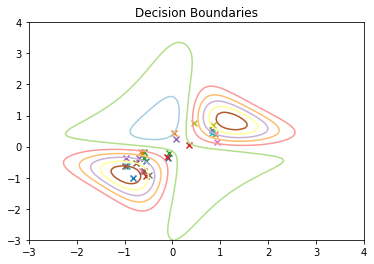

In [186]:
from sklearn import svm

CB = 1.0  # SVM regularization parameter
clfB = svm.SVC(kernel = 'rbf',  gamma=0.7, C=CB )
clfB.fit(inputB_padded, sign_xy.ravel())

hB = 0.02# step size in the mesh
# create a mesh to plot in
for l in range(len(sign_xy)):
    if sign_xy[l] == 1:
        plt.scatter(inputB_padded[l, 0], inputB_padded[l, 1], marker=u'x')
    elif sign_xy[l] == 0:
        plt.scatter(inputB_padded[l, 0], inputB_padded[l, 1], marker=u'o')
 
xb, yb = np.mgrid[-3:4:100j, -3:4:100j]


XXXB = []
for xsB, ysB in zip(xb, yb):
    for x_b, y_b in zip(xsB, ysB):
        XXXB.append([x_b,y_b,y_b*x_b])
ZB = clfB.decision_function(XXXB)

# Put the result into a color plot
ZB = ZB.reshape(xb.shape)
plt.contour(xb, yb, ZB, cmap=plt.cm.Paired)
plt.title("Decision Boundaries")
plt.show()